## Sampling Techniques

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data=pd.read_csv('C:\\Users\\krishna meghana\\Downloads\\adult.csv',header=None)

In [4]:
data.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__Numerical Attributes__: Age, FnlWgt, Education-num, Capital-Gain, Capital-Loss, Hours-Per-Week.


__Categorical Attributes__: WorkClass, Education, Marital-Status, Occupation, Relationship, Race, Sex, Native-Country, Income.

- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


There appears to be a huge difference in the minimum and maximum values. The data needs to be scaled for modeling.

In [9]:
#Checking for missing values

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values. But just to be sure, looking at the value counts of a categorical variable

In [10]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Here, we have encountered an unknown character '?'

The missing values must have been imputed with this character. Replacing this character with nan values to get the exact number of missing values.

In [12]:
data[data == ' ?'] = np.nan

In [13]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

The variables - __workclass__, __occupation__ and __native_country__ contain missing values. All of these variables are of categorical data type. So, we can impute the missing values with the most frequent value of that column - the mode.

In [14]:
data["workclass"]=data["workclass"].fillna(data["workclass"].mode()[0])
data["occupation"]=data["occupation"].fillna(data["occupation"].mode()[0])
data["native_country"]=data["native_country"].fillna(data["native_country"].mode()[0])

In [15]:
#Now we again check for missing values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values now.

In [16]:
data.duplicated().sum()

24

In [17]:
print("Initial shape of the dataset : ", data.shape)

# Dropping the duplicate Rows
data = data.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", data.shape)

Initial shape of the dataset :  (32561, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


In [18]:
data1=data

In [19]:
# Reformat The Column We Are Predicting
data1['income']=data['income'].map({' <=50K': 0, ' >50K': 1})
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
data1.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

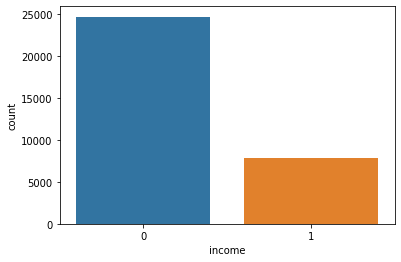

In [21]:
sns.countplot(data1['income'],label="Count")
plt.show()

- The number of people earning more than 50K dollars an year is almost one third of the people earning less than it.

The classes are imbalanced.

### Setting feature vector and target variable

As we see that the values of attributes in the dataset vary largely, so it is important to scale the data.

In [22]:
X = data1.drop(['income'], axis=1)

y = data1['income']

### Split data into separate training and test set

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Encoding categorical variables

In [24]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [25]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
13011,36,3,316298,9,13,4,12,3,4,1,0,0,40,38
24494,30,3,101283,15,10,4,7,1,4,0,0,0,40,38
16923,41,3,143003,8,11,2,7,0,1,1,7298,0,60,18
25335,46,4,216414,12,14,2,11,0,4,1,0,1977,60,38
12363,37,1,249392,8,11,2,10,0,4,1,0,0,40,38


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### Logistic Regression

Logistic Regression is one of the easiest and most commonly used supervised Machine learning algorithms for categorical classification. The basic fundamental concepts of Logistic Regression are easy to understand and can be used as a baseline algorithm for any binary (0 or 1) classification problem.

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
#Train our model with the training data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
#print our price predictions on our test data
y_pred = log_reg.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6936  409]
 [1311 1106]]


0.8238065970088096

In [30]:
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)}")

The accuracy of the model is 0.824


#### Over sampling is a method used to increase the data of the minority class such that it is in some proportion with the minority class.
### SMOTE — Synthetic Minority Oversampling TEchnique

In [31]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)


Counter({0: 17353, 1: 5422})


In [32]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)
np.bincount(y_train_smote)

array([17353, 17353], dtype=int64)

In [33]:
log_reg.fit(X_train_smote, y_train_smote)
y_pred_smote = log_reg.predict(X_test)

cm = confusion_matrix(y_test, y_pred_smote)
print(cm)

accuracy_score(y_test, y_pred_smote)

[[5635 1710]
 [ 543 1874]]


0.7692071296865396

In [34]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 24698, 1: 7839})
Resample dataset shape Counter({0: 24698, 1: 24698})


In [39]:
X_ros_onehot = pd.get_dummies(X_ros, columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])

In [40]:
X_ros_onehot.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros_onehot, y_ros, test_size = 0.3, random_state = 0)

In [42]:
log_reg.fit(X_train_ros, y_train_ros)
y_pred_ros = log_reg.predict(X_test_ros)

In [43]:
cm1 = confusion_matrix(y_test_ros, y_pred_ros)
print(cm1)

accuracy_score(y_test_ros, y_pred_ros)

[[6946  526]
 [5074 2273]]


0.6221067548417573

#### We can observe that without using any technique to deal with the imbalanced data, the accuracy obtained is 82%
#### Using SMOTE, the accuracy obtained is 76%
#### Using oversampling, the accuracy obtained is 62%